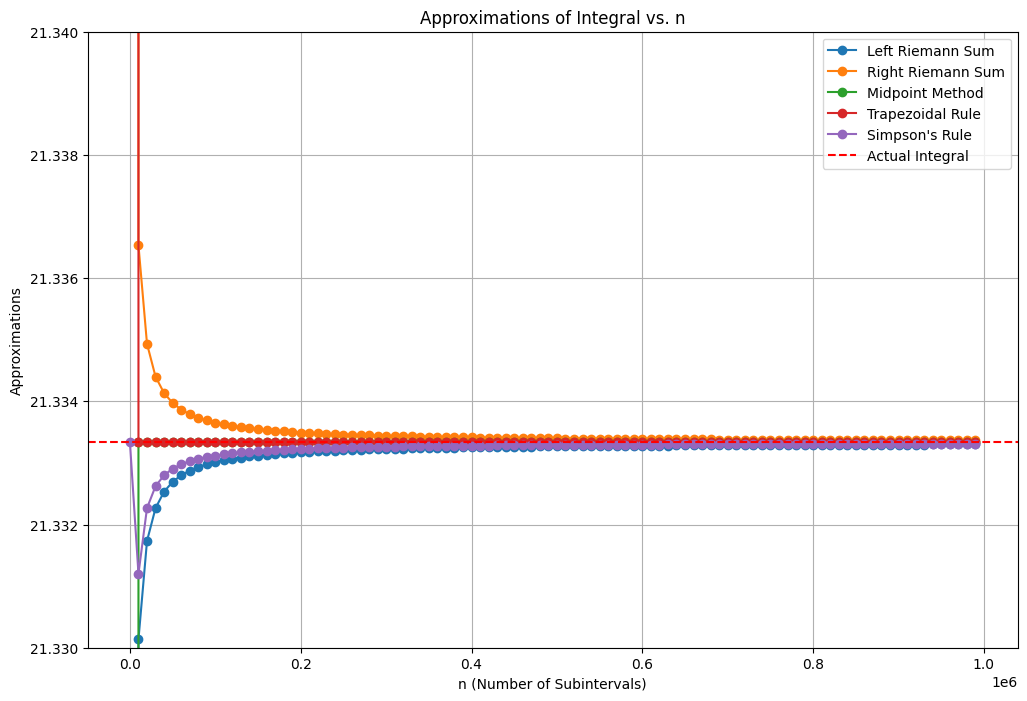

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def left_riemann_sum(a, b, n):
    delta_x = (b - a) / n
    sum = 0
    i = 0
    x_values = []
    while i < n:
        x_i = a + i * delta_x
        sum += f(x_i)
        x_values.append(x_i)
        i += 1
    return sum * delta_x, x_values

def right_riemann_sum(a, b, n):
    delta_x = (b - a) / n
    sum = 0
    i = 1
    x_values = []
    while i <= n:
        x_i = a + i * delta_x
        sum += f(x_i)
        x_values.append(x_i)
        i += 1
    return sum * delta_x, x_values

def midpoint_method(a, b, n):
    delta_x = (b - a) / n
    sum = 0
    i = 0
    x_values = []
    while i < n:
        x_midpoint = a + (i + 0.5) * delta_x
        sum += f(x_midpoint)
        x_values.append(x_midpoint)
        i += 1
    return sum * delta_x, x_values

def trapezoidal_rule(a, b, n):
    delta_x = (b - a) / n
    sum = 0
    x_values = []
    i = 0
    while i < n:
        x_i = a + i * delta_x
        x_next = a + (i + 1) * delta_x
        sum += 0.5 * (f(x_i) + f(x_next))
        x_values.append(x_i)
        i += 1
    return sum * delta_x, x_values

def simpsons_rule(a, b, n):
    delta_x = (b - a) / n
    sum = f(a) + f(b)
    x_values = [a, b]
    i = 1
    while i < n:
        x_i = a + i * delta_x
        if i % 2 == 0:
            sum += 2 * f(x_i)
        else:
            sum += 4 * f(x_i)
        x_values.append(x_i)
        i += 1
    return sum * delta_x / 3, x_values

a = 0
b = 4

actual_integral = (1/3) * (b**3 - a**3)

n_values = np.arange(1, 10**6+1, 10000)

left_sums = []
right_sums = []
midpoint_sums = []
trapezoidal_sums = []
simpsons_sums = []

for n in n_values:
    left_sum, left_x_values = left_riemann_sum(a, b, n)
    right_sum, right_x_values = right_riemann_sum(a, b, n)
    midpoint_sum, midpoint_x_values = midpoint_method(a, b, n)
    trapezoidal_sum, trapezoidal_x_values = trapezoidal_rule(a, b, n)
    simpsons_sum, simpsons_x_values = simpsons_rule(a, b, n)

    left_sums.append(left_sum)
    right_sums.append(right_sum)
    midpoint_sums.append(midpoint_sum)
    trapezoidal_sums.append(trapezoidal_sum)
    simpsons_sums.append(simpsons_sum)

plt.figure(figsize=(12, 8))
plt.plot(n_values, left_sums, label='Left Riemann Sum', marker='o')
plt.plot(n_values, right_sums, label='Right Riemann Sum', marker='o')
plt.plot(n_values, midpoint_sums, label='Midpoint Method', marker='o')
plt.plot(n_values, trapezoidal_sums, label='Trapezoidal Rule', marker='o')
plt.plot(n_values, simpsons_sums, label="Simpson's Rule", marker='o')
plt.axhline(actual_integral, color='r', linestyle='--', label='Actual Integral')
plt.gca().set_ylim([21.33, 21.34])
plt.xlabel('n (Number of Subintervals)')
plt.ylabel('Approximations')
plt.title('Approximations of Integral vs. n')
plt.legend()
plt.grid(True)
plt.show()